In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:05<00:00, 32.1MB/s]
100% 149M/149M [00:05<00:00, 27.9MB/s]


In [5]:
def get_class_paths(path):
    classes = []
    class_paths = []

    # Iterate through directories in the training path
    for label in os.listdir(path):
        label_path = os.path.join(path, label)

        # Check if it's a directory
        if os.path.isdir(label_path):
            # Iterate through images in the label directory
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)

                # Add class and path to respective lists
                classes.append(label)
                class_paths.append(image_path)

    # Create a DataFrame with the collected data
    df = pd.DataFrame(
        {
            'Class Path': class_paths,
            'Class': classes
        }
    )

    return df


In [7]:
tr_df = get_class_paths('/content/Training')

In [8]:
tr_df

,Class Path,Class
0,/content/Training/glioma/Tr-gl_0763.jpg,glioma
1,/content/Training/glioma/Tr-gl_0108.jpg,glioma
2,/content/Training/glioma/Tr-gl_0861.jpg,glioma
3,/content/Training/glioma/Tr-glTr_0006.jpg,glioma
4,/content/Training/glioma/Tr-gl_0477.jpg,glioma
...,...,...
5707,/content/Training/notumor/Tr-no_1035.jpg,notumor
5708,/content/Training/notumor/Tr-no_1404.jpg,notumor
5709,/content/Training/notumor/Tr-no_0239.jpg,notumor
5710,/content/Training/notumor/Tr-no_0821.jpg,notumor


In [9]:
ts_df = get_class_paths('/content/Testing')

In [10]:
ts_df

,Class Path,Class
0,/content/Testing/glioma/Te-gl_0148.jpg,glioma
1,/content/Testing/glioma/Te-gl_0210.jpg,glioma
2,/content/Testing/glioma/Te-gl_0201.jpg,glioma
3,/content/Testing/glioma/Te-gl_0257.jpg,glioma
4,/content/Testing/glioma/Te-glTr_0003.jpg,glioma
...,...,...
1306,/content/Testing/notumor/Te-no_0116.jpg,notumor
1307,/content/Testing/notumor/Te-no_0179.jpg,notumor
1308,/content/Testing/notumor/Te-no_0292.jpg,notumor
1309,/content/Testing/notumor/Te-no_0281.jpg,notumor


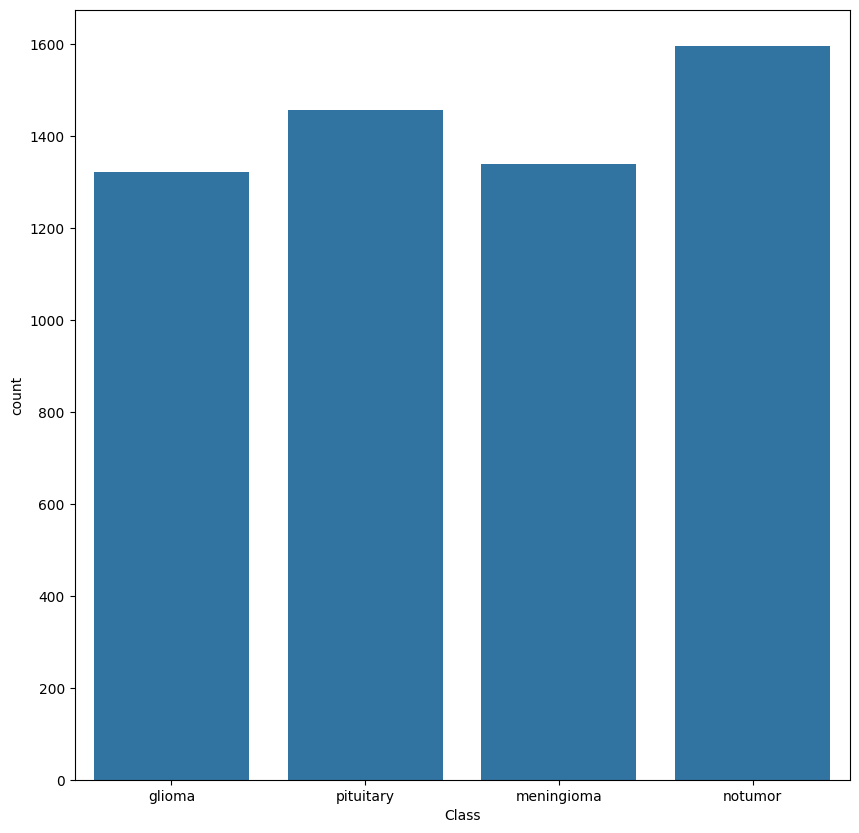

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
ax = sns.countplot(x=tr_df['Class'], data=tr_df)
plt.show()

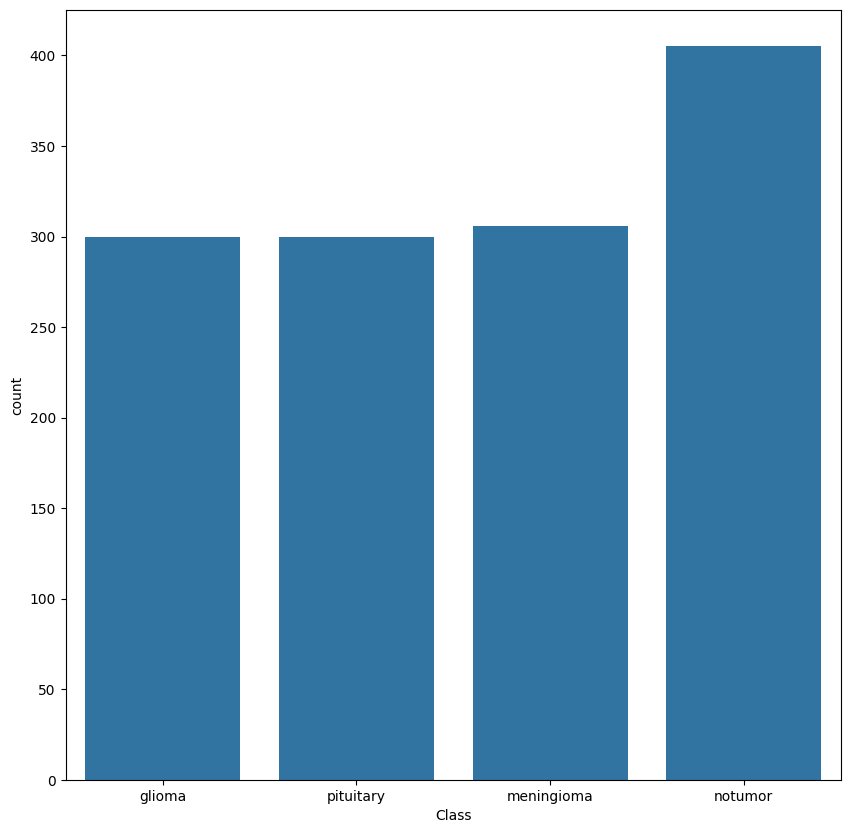

In [14]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(x=ts_df['Class'], data=ts_df)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [17]:
valid_df, ts_df = train_test_split(ts_df, test_size=0.5, stratify=ts_df['Class'])

In [18]:
valid_df

,Class Path,Class
1038,/content/Testing/notumor/Te-no_0046.jpg,notumor
1280,/content/Testing/notumor/Te-no_0397.jpg,notumor
856,/content/Testing/meningioma/Te-me_0180.jpg,meningioma
461,/content/Testing/pituitary/Te-pi_0146.jpg,pituitary
591,/content/Testing/pituitary/Te-pi_0209.jpg,pituitary
...,...,...
1232,/content/Testing/notumor/Te-no_0378.jpg,notumor
362,/content/Testing/pituitary/Te-pi_0075.jpg,pituitary
208,/content/Testing/glioma/Te-gl_0150.jpg,glioma
1089,/content/Testing/notumor/Te-no_0029.jpg,notumor


In [19]:
ts_df

,Class Path,Class
1164,/content/Testing/notumor/Te-no_0164.jpg,notumor
465,/content/Testing/pituitary/Te-piTr_0006.jpg,pituitary
97,/content/Testing/glioma/Te-gl_0175.jpg,glioma
89,/content/Testing/glioma/Te-gl_0188.jpg,glioma
1070,/content/Testing/notumor/Te-no_0056.jpg,notumor
...,...,...
836,/content/Testing/meningioma/Te-me_0250.jpg,meningioma
1219,/content/Testing/notumor/Te-no_0366.jpg,notumor
1050,/content/Testing/notumor/Te-no_0404.jpg,notumor
1027,/content/Testing/notumor/Te-no_0132.jpg,notumor


In [21]:
batch_size = 32
img_size = (299,299)

image_generator = ImageDataGenerator( rescale=1./255, brightness_range=(0.0,1.2))

ts_gen = ImageDataGenerator(rescale=1./255)

In [24]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size)

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size)

ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=16,
    shuffle=False)



Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.
